In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/liaw/Desktop/cell_samples.csv')

In [3]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
#  Check data type and if there is any null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
# Convert Str to numeric data
df.BareNuc = pd.to_numeric(df.BareNuc,errors='coerce')

In [6]:
# Check if it has been converted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           699 non-null    int64  
 1   Clump        699 non-null    int64  
 2   UnifSize     699 non-null    int64  
 3   UnifShape    699 non-null    int64  
 4   MargAdh      699 non-null    int64  
 5   SingEpiSize  699 non-null    int64  
 6   BareNuc      683 non-null    float64
 7   BlandChrom   699 non-null    int64  
 8   NormNucl     699 non-null    int64  
 9   Mit          699 non-null    int64  
 10  Class        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [7]:
# Check how many null value there is
df.isna().sum()

ID              0
Clump           0
UnifSize        0
UnifShape       0
MargAdh         0
SingEpiSize     0
BareNuc        16
BlandChrom      0
NormNucl        0
Mit             0
Class           0
dtype: int64

In [8]:
# Knowing it won't impact data too much due to null value size chose to remove then by filtering out
df = df[~df.isna().any(axis=1)]

In [9]:
# Check if it has been removed
df.isna().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [10]:
# By convention convert 2 for 0 and 4 for 1 to denote Benign or Malignant
df['Class'] = [0 if x==2 else 1 for x in df.Class]

In [11]:
# Check if it's unbalanced
print(df['Class'].value_counts())

0    444
1    239
Name: Class, dtype: int64


In [12]:
# Split features and target
x = df.drop('Class',axis=1)
y = df['Class']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

/Users/liaw/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,random_state=0,test_size=0.2)
print(xtrain.shape, xtest.shape)

(546, 10) (137, 10)


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [16]:
# Train LogisticRegression & RandomForestClassifier
LRtrained = LogisticRegression(random_state=0).fit(xtrain,ytrain)
RFtrained = RandomForestClassifier(random_state=0).fit(xtrain,ytrain)

In [17]:
# Predict from LogisticRegression & RandomForestClassifier
LRpredict = LRtrained.predict(xtest)
RFpredict = RFtrained.predict(xtest)

In [18]:
# Check results for both models
print(f'accuracy of LR model is {accuracy_score(ytest,LRpredict)}')
print(f'precision of LR model is {precision_score(ytest,LRpredict)}')
print(f'recall of LR model is {recall_score(ytest,LRpredict)}')
print()
print(f'accuracy of RF model is {accuracy_score(ytest,RFpredict)}')
print(f'precision of RF model is {precision_score(ytest,RFpredict)}')
print(f'recall of RF model is {recall_score(ytest,RFpredict)}')

accuracy of LR model is 0.635036496350365
precision of LR model is 0.0
recall of LR model is 0.0

accuracy of RF model is 0.9708029197080292
precision of RF model is 0.9423076923076923
recall of RF model is 0.98


/Users/liaw/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
# Use confusion matrix to show result more straigtforward
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Text(627.9949494949494, 0.5, 'Actual')

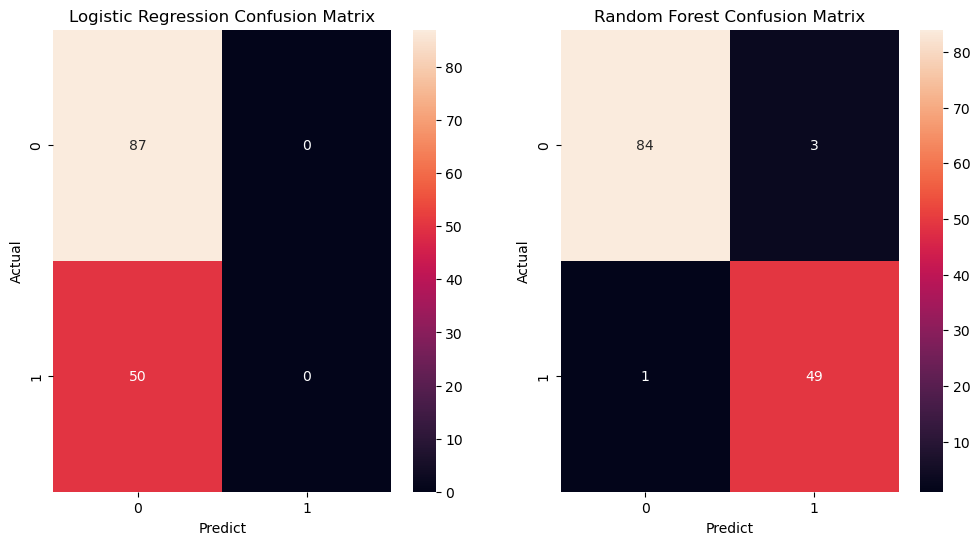

In [22]:
# We could see random forest model outperforms logistic regression easily 
# both from detecting correct positive number from all positive case 
# or in its positive prediction how much is correctly predicted
fig,axs = plt.subplots(1,2,figsize=(12,6))

LRCM = confusion_matrix(ytest,LRpredict)
sns.heatmap(LRCM,annot=True,fmt=',', ax=axs[0])
axs[0].set_title('Logistic Regression Confusion Matrix') 
axs[0].set_xlabel('Predict')
axs[0].set_ylabel('Actual')

RFCM = confusion_matrix(ytest,RFpredict)
sns.heatmap(RFCM,annot=True,fmt=',',ax=axs[1])
axs[1].set_title('Random Forest Confusion Matrix') 
axs[1].set_xlabel('Predict')
axs[1].set_ylabel('Actual')

In [24]:
ytest.value_counts()

0    87
1    50
Name: Class, dtype: int64